In [1]:
# Under conda-env: LSTM
# import sys
# !conda install --yes --prefix {sys.prefix} packagename
import os
import seaborn as sns
import pandas as pd
import missingno as msno
import numpy as np
from sklearn.impute import SimpleImputer
import difflib
import folium
from random import sample
import datetime as dt 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
import sys


In [3]:
# skip reading
postcodecsv = pd.read_csv('au_postcodes.csv') 
import pandas as pd
from statistics import median
from statistics import mean
from scipy import stats

ndf = pd.read_json('POA_2016_AUST.json')
ndf1 = ndf['features'].apply(pd.Series)
ndf2 = ndf1['geometry'].apply(pd.Series)
ndf3 = ndf1['properties'].apply(pd.Series)
border = ndf2['coordinates']

depth = lambda L: isinstance(L, list) and max(map(depth, L))+1

def flatten(d, l=1):
    for i in d:
        yield from ([i] if l == 1 else flatten(i, l-1))

def centerlocation(index):
    tmplst = list(flatten(border[index], l= depth(border[index])))
    longi = median([i for i in tmplst  if i > 0])
    lati = median([i for i in tmplst  if i < 0])
    return[longi,lati]

postcodedf = []
i = 0
for i in range(len(ndf)):
    if depth(border[i])>0:
        tpd = {
        'postcode':[ndf3['POA_CODE16'].iloc[i]],
        'longitude':[centerlocation(i)[0]],
        'latitude':[centerlocation(i)[1]]}
        tpdf = pd.DataFrame(tpd)
        postcodedf.append(tpdf)
    else:
        print(i)
        continue
    i = i+1
postcodedf = pd.concat(postcodedf,ignore_index=True)


/var/folders/s1/vpd2prqd5fsc16qqsymrc9b00000gn/T/ipykernel_1044/3336808061.py:10: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ndf2 = ndf1['geometry'].apply(pd.Series)
/var/folders/s1/vpd2prqd5fsc16qqsymrc9b00000gn/T/ipykernel_1044/3336808061.py:10: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ndf2 = ndf1['geometry'].apply(pd.Series)


2668
2669


In [4]:
# skip reading
data =  pd.read_csv('./markettrends0.csv', dtype = {'state': 'str', 'sa3_name16': 'str','sa4_name16': 'str',
                                                   'postcode': 'str','state': 'str','property_type':'str'})
data['value_at_date']= pd.to_datetime(data['value_at_date'])
data['value_at_date'] = data['value_at_date'].dt.date.apply(lambda x: x.strftime('%Y-%m'))
data.head(15)
ndata = data.fillna({'Volume of new rental listings (1 month)': 0, 'Volume of sales (1 month)': 0}).dropna(subset = ['postcode'])
ndatahouses = ndata[:][ndata.property_type == 'Houses']
ndataunits = ndata[:][ndata.property_type == 'Units']


In [5]:
# skip reading
UniquePostcode = ndatahouses.postcode.unique()[:]
DataFrameDict_postcode = {elem : pd.DataFrame for elem in UniquePostcode}
for key in DataFrameDict_postcode.keys():
    DataFrameDict_postcode[key] = ndatahouses[:][ndatahouses.postcode == key]

In [6]:
aveHPI = []
lst = ['postcode', 'date', 'logHPI','logHPIdiff']
# Calling DataFrame constructor on list  
for key in DataFrameDict_postcode.keys():
    df = pd.DataFrame([], columns = lst)  
    df['Description'] = DataFrameDict_postcode[key]['value_at_date'].loc[('2019-12'>DataFrameDict_postcode[key]['value_at_date']) & (DataFrameDict_postcode[key]['value_at_date']>'1990-12')]
    df['logHPI'] = np.log2(DataFrameDict_postcode[key]['Hedonic Home Value Index'].loc[('2019-12'>DataFrameDict_postcode[key]['value_at_date']) & (DataFrameDict_postcode[key]['value_at_date']>'1990-12')])
    df['postcode'] = key
    df['logHPIdiff'] = df['logHPI'].diff(1)
    aveHPI.append(df)
    
aveHPIdf = pd.concat(aveHPI)
aveHPIdf = aveHPIdf.reset_index(drop =True)

In [7]:
agg = aveHPIdf.groupby('Description')['logHPIdiff'].agg(['mean']).reset_index()
agg.dropna()

,Description,mean
1,1991-02,0.006350
2,1991-03,0.003466
3,1991-04,0.009956
4,1991-05,0.001707
5,1991-06,0.000854
...,...,...
342,2019-07,-0.005289
343,2019-08,-0.006170
344,2019-09,0.003032
345,2019-10,0.004820


In [8]:
# skip reading
xls1 = pd.read_excel("f01hist.xls",sheet_name='Data',header = 2)
xls1 = xls1.drop(xls1.index[0:8],axis = 0)
xls1['Description'] = pd.to_datetime(xls1['Description'])
xls1['Description'] = xls1['Description'].dt.date.apply(lambda x: x.strftime('%Y-%m'))
xls3 = pd.read_excel("f11hist-1969-2009.xls",sheet_name='Data',header = 2)
xls3 = xls3.drop(xls3.index[0:8],axis = 0)
xls3['Description'] = pd.to_datetime(xls3['Description'])
xls3['Description'] = xls3['Description'].dt.date.apply(lambda x: x.strftime('%Y-%m'))
xls4 = pd.read_excel("f11hist.xls",sheet_name='Data',header = 2)
xls4 = xls4.drop(xls4.index[0:8],axis = 0)
xls4['Description'] = pd.to_datetime(xls4['Description'])
xls4['Description'] = xls4['Description'].dt.date.apply(lambda x: x.strftime('%Y-%m'))
xls34 = pd.concat([xls3, xls4], axis=0)
xls5 = pd.read_excel("g01hist.xls",sheet_name='Data',header = 2)
xls5 = xls5.drop(xls5.index[0:8],axis = 0)
xls5['Description'] = pd.to_datetime(xls5['Description'])
xls5['Description'] = xls5['Description'].dt.date.apply(lambda x: x.strftime('%Y-%m'))
xls6 = pd.read_excel("h01hist.xls",sheet_name='Data',header = 2)
xls6 = xls6.drop(xls6.index[0:8],axis = 0)
xls6['Description'] = pd.to_datetime(xls6['Description'])
xls6['Description'] = xls6['Description'].dt.date.apply(lambda x: x.strftime('%Y-%m'))
xls7 = pd.read_excel("h03hist.xls",sheet_name='Data',header = 2)
xls7 = xls7.drop(xls7.index[0:8],axis = 0)
xls7['Description'] = pd.to_datetime(xls7['Description'])
xls7['Description'] = xls7['Description'].dt.date.apply(lambda x: x.strftime('%Y-%m'))


In [8]:
# skip reading
macvar = pd.DataFrame().assign(Description = xls7.loc[('2021-06'>xls7['Description']) & (xls7['Description']>'1999-12')]['Description'])
macvar.reset_index(drop =True, inplace = True)

macvar = pd.merge(macvar,xls1[['Description','Cash Rate Target; monthly average']],on='Description', how='left')
macvar = pd.merge(macvar,xls34[['Description','AUD/USD Exchange Rate; see notes for further detail.']],on='Description', how='left')
macvar = pd.merge(macvar,xls5[['Description','Consumer price index; All groups']],on='Description', how='left')
macvar = pd.merge(macvar,xls6[['Description','Gross domestic product (GDP); Chain volume']],on='Description', how='left')
macvar = pd.merge(macvar,xls7[['Description','Retail sales; All industries; Current price']],on='Description', how='left')
macvar = pd.merge(macvar,xls7[['Description','Private dwelling approvals']],on='Description', how='left')

macvar = macvar.set_axis(['date','ir', 'exr', 'cpi', 'gdp', 'rs','pda'], axis=1, inplace=False)
macvar['ir'] = macvar['ir'].astype(float, errors = 'raise') 
macvar['exr'] = macvar['exr'].astype(float, errors = 'raise')
macvar['cpi'] = macvar['cpi'].astype(float, errors = 'raise')
macvar['gdp'] = macvar['gdp'].astype(float, errors = 'raise')
macvar['rs'] = macvar['rs'].astype(float, errors = 'raise')
macvar['pda'] = macvar['pda'].astype(float, errors = 'raise')
macvar = macvar.interpolate()
macvarst = macvar


lag = [1,2,3,4,5,6,7,8,9,10,11,12]
threshold = 0.01
for i in lag:
    if adfuller(macvar['ir'].pct_change(i).dropna(how = 'all') )[1]<threshold:
        macvarst[f'ir{i}'] = macvar['ir'].pct_change(i)  
    if adfuller(macvar['ir'].pct_change(i).diff().dropna(how = 'all') )[1]<threshold:
        macvarst[f'ir{i}_2'] = macvar['ir'].pct_change(i).diff()  
        
    if adfuller(macvar['exr'].pct_change(i).dropna(how = 'all'))[1]<threshold:
        macvarst[f'exr{i}'] = macvar['exr'].pct_change(i)
    if adfuller(macvar['exr'].pct_change(i).diff().dropna(how = 'all'))[1]<threshold:
        macvarst[f'exr{i}_2'] = macvar['exr'].pct_change(i).diff()    
        
    if adfuller(macvar['cpi'].pct_change(i).dropna(how = 'all'))[1]<threshold:
        macvarst[f'cpi{i}'] = macvar['cpi'].pct_change(i)
    if adfuller(macvar['cpi'].pct_change(i).diff().dropna(how = 'all'))[1]<threshold:
        macvarst[f'cpi{i}_2'] = macvar['cpi'].pct_change(i).diff()
        
    if adfuller(macvar['gdp'].pct_change(i).dropna(how = 'all'))[1]<threshold:
        macvarst[f'gdp{i}'] = macvar['gdp'].pct_change(i)
    if adfuller(macvar['gdp'].pct_change(i).diff().dropna(how = 'all'))[1]<threshold:
        macvarst[f'gdp{i}_2'] = macvar['gdp'].pct_change(i).diff() 
        
    if adfuller(macvar['rs'].pct_change(i).dropna(how = 'all'))[1]<threshold:
        macvarst[f'rs{i}'] = macvar['rs'].pct_change(i)
    if adfuller(macvar['rs'].pct_change(i).diff().dropna(how = 'all'))[1]<threshold:
        macvarst[f'rs{i}_2'] = macvar['rs'].pct_change(i).diff() 
        
    if adfuller(macvar['pda'].pct_change(i).dropna(how = 'all'))[1]<threshold:
        macvarst[f'pda{i}'] = macvar['pda'].pct_change(i)
    if adfuller(macvar['pda'].pct_change(i).diff().dropna(how = 'all'))[1]<threshold:
        macvarst[f'pda{i}_2'] = macvar['pda'].pct_change(i).diff()     
 

/var/folders/s1/vpd2prqd5fsc16qqsymrc9b00000gn/T/ipykernel_1931/3234590507.py:49: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  macvarst[f'rs{i}_2'] = macvar['rs'].pct_change(i).diff()
/var/folders/s1/vpd2prqd5fsc16qqsymrc9b00000gn/T/ipykernel_1931/3234590507.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  macvarst[f'pda{i}_2'] = macvar['pda'].pct_change(i).diff()


In [10]:
month = [int(my_str.split("-")[1]) for my_str in macvarst['date'].values]
quater= [(m-1)//3 + 1 for m in month]
monthdummies = pd.get_dummies(month,prefix = 'month')
quaterdummies = pd.get_dummies(quater,prefix = 'quater')
dummies  = pd.concat([monthdummies,quaterdummies],axis =1)
# macvarst  =  pd.concat([macvarst,dummies],axis =1)
macvarst  =  pd.concat([macvarst,monthdummies],axis =1)

In [11]:
# # skip reading
# macvar = pd.DataFrame().assign(Description = xls7.loc[('2021-06'>xls7['Description']) & (xls7['Description']>'1999-12')]['Description'])
# macvar.reset_index(drop =True, inplace = True)

# macvar = pd.merge(macvar,xls1[['Description','Cash Rate Target; monthly average']],on='Description', how='left')
# macvar = pd.merge(macvar,xls34[['Description','AUD/USD Exchange Rate; see notes for further detail.']],on='Description', how='left')
# macvar = pd.merge(macvar,xls5[['Description','Consumer price index; All groups']],on='Description', how='left')
# macvar = pd.merge(macvar,xls6[['Description','Gross domestic product (GDP); Chain volume']],on='Description', how='left')
# macvar = pd.merge(macvar,xls7[['Description','Retail sales; All industries; Current price']],on='Description', how='left')
# macvar = pd.merge(macvar,xls7[['Description','Private dwelling approvals']],on='Description', how='left')
# macvar = pd.merge(macvar,agg[['Description','mean']],on='Description', how='left')

# macvar = macvar.set_axis(['date','ir', 'exr', 'cpi', 'gdp', 'rs','pda','loghpidiff'], axis=1, inplace=False)
# macvar['ir'] = macvar['ir'].astype(float, errors = 'raise') 
# macvar['exr'] = macvar['exr'].astype(float, errors = 'raise')
# macvar['cpi'] = macvar['cpi'].astype(float, errors = 'raise')
# macvar['gdp'] = macvar['gdp'].astype(float, errors = 'raise')
# macvar['rs'] = macvar['rs'].astype(float, errors = 'raise')
# macvar['pda'] = macvar['pda'].astype(float, errors = 'raise')
# macvar['loghpidiff'] = macvar['loghpidiff'].astype(float, errors = 'raise')
# macvar = macvar.interpolate()
# macvarst = macvar


# lag = [1,2,3,4,5,6,7,8,9,10,11,12]
# threshold = 0.01
# for i in lag:
#     if adfuller(macvar['ir'].pct_change(i).dropna(how = 'all') )[1]<threshold:
#         macvarst[f'ir{i}'] = macvar['ir'].pct_change(i)  
#     if adfuller(macvar['ir'].pct_change(i).diff().dropna(how = 'all') )[1]<threshold:
#         macvarst[f'ir{i}_2'] = macvar['ir'].pct_change(i).diff()  
        
#     if adfuller(macvar['exr'].pct_change(i).dropna(how = 'all'))[1]<threshold:
#         macvarst[f'exr{i}'] = macvar['exr'].pct_change(i)
#     if adfuller(macvar['exr'].pct_change(i).diff().dropna(how = 'all'))[1]<threshold:
#         macvarst[f'exr{i}_2'] = macvar['exr'].pct_change(i).diff()    
        
#     if adfuller(macvar['cpi'].pct_change(i).dropna(how = 'all'))[1]<threshold:
#         macvarst[f'cpi{i}'] = macvar['cpi'].pct_change(i)
#     if adfuller(macvar['cpi'].pct_change(i).diff().dropna(how = 'all'))[1]<threshold:
#         macvarst[f'cpi{i}_2'] = macvar['cpi'].pct_change(i).diff()
        
#     if adfuller(macvar['gdp'].pct_change(i).dropna(how = 'all'))[1]<threshold:
#         macvarst[f'gdp{i}'] = macvar['gdp'].pct_change(i)
#     if adfuller(macvar['gdp'].pct_change(i).diff().dropna(how = 'all'))[1]<threshold:
#         macvarst[f'gdp{i}_2'] = macvar['gdp'].pct_change(i).diff() 
        
#     if adfuller(macvar['rs'].pct_change(i).dropna(how = 'all'))[1]<threshold:
#         macvarst[f'rs{i}'] = macvar['rs'].pct_change(i)
#     if adfuller(macvar['rs'].pct_change(i).diff().dropna(how = 'all'))[1]<threshold:
#         macvarst[f'rs{i}_2'] = macvar['rs'].pct_change(i).diff() 
        
#     if adfuller(macvar['pda'].pct_change(i).dropna(how = 'all'))[1]<threshold:
#         macvarst[f'pda{i}'] = macvar['pda'].pct_change(i)
#     if adfuller(macvar['pda'].pct_change(i).diff().dropna(how = 'all'))[1]<threshold:
#         macvarst[f'pda{i}_2'] = macvar['pda'].pct_change(i).diff()     
    
#     if adfuller(macvar['loghpidiff'].pct_change(i).dropna(how = 'all'))[1]<threshold:
#         macvarst[f'loghpidiff{i}'] = macvar['loghpidiff'].pct_change(i)
#     if adfuller(macvar['loghpidiff'].pct_change(i).diff().dropna(how = 'all'))[1]<threshold:
#         macvarst[f'loghpidiff{i}_2'] = macvar['loghpidiff'].pct_change(i).diff()   
            
# macvarst['loghpidiff'] = macvar['loghpidiff']   

In [12]:
from sklearn.preprocessing import PolynomialFeatures
# skip reading
macvarsta = macvarst[macvarst.columns.difference(['ir','exr','cpi','gdp','rs','pda'])]
# macvarsta = macvarst[macvarst.columns.difference(['ir','exr','cpi','gdp','rs','pda','loghpidiff'])]
matrixmac = macvarsta.corr().round(2)
macdata = macvarsta.loc[('2019-12'> macvarsta['date']) & (macvarsta['date']>'2001-12')]

pca =PCA()
X_train = macdata.loc[:, macdata.columns != 'date']
trans = PolynomialFeatures(degree=2)
X_train_extended = trans.fit_transform(X_train)
pca.fit(X_train_extended)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.9) + 1
print(d)

pca_d =  PCA(n_components=d)
pca_d.fit(X_train)
X_pca_d = pca_d.transform(X_train)
PCnames = []
for i in range(1,d+1,1):
    PCnames.append(f'PC{i}')    
pcadf = pd.DataFrame(X_pca_d,columns = PCnames)

34


In [13]:
macvarsta.columns

Index(['cpi1', 'cpi10_2', 'cpi11_2', 'cpi12_2', 'cpi1_2', 'cpi2_2', 'cpi3_2',
       'cpi4_2', 'cpi5', 'cpi5_2',
       ...
       'rs4', 'rs4_2', 'rs5', 'rs5_2', 'rs6', 'rs6_2', 'rs7_2', 'rs8', 'rs8_2',
       'rs9_2'],
      dtype='object', length=108)

In [14]:
pca_avg=pd.concat([pcadf,agg['mean'].loc[('2019-12'>agg['Description']) & (agg['Description']>'2001-12')].reset_index(drop = True)],axis=1)
# skip reading
paneldata = []
lst = ['postcode', 'date','logHPI','difflogHPI']
for key in DataFrameDict_postcode.keys():
    df = pd.DataFrame([], columns = lst)  
    df['date'] = DataFrameDict_postcode[key]['value_at_date'].loc[('2019-12'>DataFrameDict_postcode[key]['value_at_date']) & (DataFrameDict_postcode[key]['value_at_date']>'2001-12')]
    df['logHPI'] = np.log2(DataFrameDict_postcode[key]['Hedonic Home Value Index'].loc[('2019-12'>DataFrameDict_postcode[key]['value_at_date']) & (DataFrameDict_postcode[key]['value_at_date']>'2001-12')])
    df['postcode'] = key
    df['difflogHPI'] = (np.log2(DataFrameDict_postcode[key]['Hedonic Home Value Index'].loc[('2019-12'>DataFrameDict_postcode[key]['value_at_date']) & (DataFrameDict_postcode[key]['value_at_date']>'2001-11')])).diff(1).dropna()
    data = pd.concat([df.reset_index(drop =True),pca_avg], axis=1)
    paneldata.append(data)
paneldf = pd.concat(paneldata,ignore_index=True) 


In [15]:
paneldf

,postcode,date,logHPI,difflogHPI,PC1,PC2,PC3,PC4,PC5,PC6,...,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,mean
0,0800,2002-01,6.566305,-0.044277,-0.061750,-0.232516,-0.135538,-0.160257,0.328539,-0.033818,...,0.136348,0.062106,0.034415,-0.115181,0.020472,0.054809,0.015134,0.006115,0.011251,0.023656
1,0800,2002-02,6.615781,0.049476,-0.171487,0.449472,-0.062217,-0.247721,0.522171,0.171627,...,0.136712,-0.091970,-0.039407,-0.042030,-0.088874,-0.028658,0.007717,-0.026731,0.003478,0.017277
2,0800,2002-03,6.637132,0.021351,0.197486,0.221982,-0.243511,-0.392467,-0.382829,0.270065,...,0.076120,-0.082977,-0.097675,0.081930,-0.018343,0.091991,-0.016231,-0.017703,-0.000421,0.012545
3,0800,2002-04,6.547985,-0.089147,0.359045,0.399364,-0.421633,0.021681,-0.344791,-0.437072,...,0.053433,-0.017382,-0.122696,-0.057980,0.046785,0.041536,0.044802,0.011371,0.018830,0.016150
4,0800,2002-05,6.569620,0.021635,-0.257499,-0.045792,0.455921,0.086339,-0.341931,-0.213898,...,-0.001398,-0.071563,-0.142925,-0.066347,-0.048736,-0.035825,0.037231,-0.050222,0.036402,0.007504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564800,7470,2019-07,6.985018,0.028652,-0.436930,-0.011289,0.217793,0.392869,-0.090993,0.481738,...,0.040940,0.049120,0.063965,0.029413,0.004897,-0.032279,-0.006257,-0.006626,0.016426,-0.005289
564801,7470,2019-08,6.970598,-0.014419,0.082287,-0.057054,0.563683,-0.408832,0.153592,-0.054049,...,0.020107,0.081754,0.063857,-0.024303,-0.088327,-0.013570,-0.022519,0.022414,0.011807,-0.006170
564802,7470,2019-09,6.916741,-0.053858,0.192838,-0.310964,-0.333214,0.027114,-0.063081,0.488473,...,0.019179,0.045284,0.048591,-0.010982,-0.043333,0.060215,-0.029265,0.030328,-0.033906,0.003032
564803,7470,2019-10,6.944083,0.027342,-0.080759,-0.081722,-0.162268,0.457054,0.475433,-0.318706,...,0.115140,-0.068075,0.006020,0.013061,0.066355,0.002155,0.036268,-0.007034,-0.038855,0.004820


In [16]:
# Panel Data
paneldf['date'] = pd.to_datetime(paneldf['date'])
panelData = paneldf.set_index(['postcode', 'date']) 
panelData

logHPI  difflogHPI       PC1       PC2       PC3  \
postcode date                                                             
0800     2002-01-01  6.566305   -0.044277 -0.061750 -0.232516 -0.135538   
         2002-02-01  6.615781    0.049476 -0.171487  0.449472 -0.062217   
         2002-03-01  6.637132    0.021351  0.197486  0.221982 -0.243511   
         2002-04-01  6.547985   -0.089147  0.359045  0.399364 -0.421633   
         2002-05-01  6.569620    0.021635 -0.257499 -0.045792  0.455921   
...                       ...         ...       ...       ...       ...   
7470     2019-07-01  6.985018    0.028652 -0.436930 -0.011289  0.217793   
         2019-08-01  6.970598   -0.014419  0.082287 -0.057054  0.563683   
         2019-09-01  6.916741   -0.053858  0.192838 -0.310964 -0.333214   
         2019-10-01  6.944083    0.027342 -0.080759 -0.081722 -0.162268   
         2019-11-01  6.940651   -0.003432  0.184934 -0.485779 -0.164645   

                          PC4       PC5       PC6       PC7       PC8  ...  \
postcode date                                                          ...   
0800     2002-01-01 -0.160257  0.328539 -0.033818 -0.100005 -0.260605  ...   
         2002-02-01 -0.247721  0.522171  0.171627  0.205484  0.415673  ...   
         2002-03-01 -0.392467 -0.382829  0.270065  0.003334 -0.255782  ...   
         2002-04-01  0.021681 -0.344791 -0.437072 -0.096141 -0.163963  ...   
         2002-05-01  0.086339 -0.341931 -0.213898  0.644590  0.116063  ...   
...                       ...       ...       ...       ...       ...  ...   
7470     2019-07-01  0.392869 -0.090993  0.481738  0.077419 -0.349015  ...   
         2019-08-01 -0.408832  0.153592 -0.054049 -0.407340 -0.243949  ...   
         2019-09-01  0.027114 -0.063081  0.488473  0.073235  0.270127  ...   
         2019-10-01  0.457054  0.475433 -0.318706  0.218612 -0.308324  ...   
         2019-11-01 -0.289653 -0.145515 -0.347442 -0.008424  0.364177  ...   

                         PC26      PC27      PC28      PC29      PC30  \
postcode date                                                           
0800     2002-01-01  0.136348  0.062106  0.034415 -0.115181  0.020472   
         2002-02-01  0.136712 -0.091970 -0.039407 -0.042030 -0.088874   
         2002-03-01  0.076120 -0.082977 -0.097675  0.081930 -0.018343   
         2002-04-01  0.053433 -0.017382 -0.122696 -0.057980  0.046785   
         2002-05-01 -0.001398 -0.071563 -0.142925 -0.066347 -0.048736   
...                       ...       ...       ...       ...       ...   
7470     2019-07-01  0.040940  0.049120  0.063965  0.029413  0.004897   
         2019-08-01  0.020107  0.081754  0.063857 -0.024303 -0.088327   
         2019-09-01  0.019179  0.045284  0.048591 -0.010982 -0.043333   
         2019-10-01  0.115140 -0.068075  0.006020  0.013061  0.066355   
         2019-11-01  0.155435  0.049349 -0.017332 -0.023827 -0.097807   

                         PC31      PC32      PC33      PC34      mean  
postcode date                                                          
0800     2002-01-01  0.054809  0.015134  0.006115  0.011251  0.023656  
         2002-02-01 -0.028658  0.007717 -0.026731  0.003478  0.017277  
         2002-03-01  0.091991 -0.016231 -0.017703 -0.000421  0.012545  
         2002-04-01  0.041536  0.044802  0.011371  0.018830  0.016150  
         2002-05-01 -0.035825  0.037231 -0.050222  0.036402  0.007504  
...                       ...       ...       ...       ...       ...  
7470     2019-07-01 -0.032279 -0.006257 -0.006626  0.016426 -0.005289  
         2019-08-01 -0.013570 -0.022519  0.022414  0.011807 -0.006170  
         2019-09-01  0.060215 -0.029265  0.030328 -0.033906  0.003032  
         2019-10-01  0.002155  0.036268 -0.007034 -0.038855  0.004820  
         2019-11-01 -0.035829 -0.035413  0.005665  0.016855  0.013358  

[564805 rows x 37 columns]

In [17]:
import statsmodels.tools.tools as sm
from linearmodels.panel.model import PooledOLS 
PCnames = []
for i in range(1,d+1,1):
    PCnames.append(f'PC{i}')
PCnames.append('mean')
exog =sm.add_constant(panelData[PCnames])
mod = PooledOLS(panelData['difflogHPI'], exog)
pooled_res = mod.fit()
print(pooled_res)

/Users/leiflyu/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/leiflyu/miniforge3/lib/python3.9/site-packages/linearmodels/panel/model.py:855: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PooledOLS Estimation Summary                          
Dep. Variable:             difflogHPI   R-squared:                        0.0480
Estimator:                  PooledOLS   R-squared (Between):              0.0000
No. Observations:              562655   R-squared (Within):               0.0483
Date:                Thu, May 26 2022   R-squared (Overall):              0.0480
Time:                        15:05:20   Log-likelihood                 1.118e+06
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      810.96
Entities:                        2617   P-value                           0.0000
Avg Obs:                       215.00   Distribution:               F(35,562619)
Min Obs:                       215.00                                           
Max Obs:                       215.00   F-statistic (robust):             810.96
                            

In [18]:
residuals_level1  = pooled_res._idiosyncratic
#print(pooled_res.__dict__)
residualsL1 =  residuals_level1.reset_index() 

In [19]:
DataFrameDict_PC = {elem : pd.DataFrame for elem in UniquePostcode}
lst = ['postcode', 'date', 'logHPI','difflogHPI']
# Calling DataFrame constructor on list  
for key in DataFrameDict_PC.keys():
    df = pd.DataFrame([], columns = lst)  
    df['date'] = DataFrameDict_postcode[key]['value_at_date'].loc[('2019-12'>DataFrameDict_postcode[key]['value_at_date']) & (DataFrameDict_postcode[key]['value_at_date']>'2001-12')]
    df['logHPI'] = np.log2(DataFrameDict_postcode[key]['Hedonic Home Value Index'].loc[('2019-12'>DataFrameDict_postcode[key]['value_at_date']) & (DataFrameDict_postcode[key]['value_at_date']>'2001-12')])
    df['postcode'] = key
    df['difflogHPI'] = (np.log2(DataFrameDict_postcode[key]['Hedonic Home Value Index'].loc[('2019-12'>DataFrameDict_postcode[key]['value_at_date']) & (DataFrameDict_postcode[key]['value_at_date']>'2001-11')])).diff(1).dropna()
    data = pd.concat([df.reset_index(drop =True),pca_avg], axis=1)
    DataFrameDict_PC[key] = data
     

In [20]:
pca_avg

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,mean
0,-0.061750,-0.232516,-0.135538,-0.160257,0.328539,-0.033818,-0.100005,-0.260605,0.011664,0.387460,...,0.136348,0.062106,0.034415,-0.115181,0.020472,0.054809,0.015134,0.006115,0.011251,0.023656
1,-0.171487,0.449472,-0.062217,-0.247721,0.522171,0.171627,0.205484,0.415673,0.172783,-0.143703,...,0.136712,-0.091970,-0.039407,-0.042030,-0.088874,-0.028658,0.007717,-0.026731,0.003478,0.017277
2,0.197486,0.221982,-0.243511,-0.392467,-0.382829,0.270065,0.003334,-0.255782,-0.519971,-0.342843,...,0.076120,-0.082977,-0.097675,0.081930,-0.018343,0.091991,-0.016231,-0.017703,-0.000421,0.012545
3,0.359045,0.399364,-0.421633,0.021681,-0.344791,-0.437072,-0.096141,-0.163963,0.347643,0.303148,...,0.053433,-0.017382,-0.122696,-0.057980,0.046785,0.041536,0.044802,0.011371,0.018830,0.016150
4,-0.257499,-0.045792,0.455921,0.086339,-0.341931,-0.213898,0.644590,0.116063,-0.134566,0.229044,...,-0.001398,-0.071563,-0.142925,-0.066347,-0.048736,-0.035825,0.037231,-0.050222,0.036402,0.007504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,-0.436930,-0.011289,0.217793,0.392869,-0.090993,0.481738,0.077419,-0.349015,0.540557,-0.298451,...,0.040940,0.049120,0.063965,0.029413,0.004897,-0.032279,-0.006257,-0.006626,0.016426,-0.005289
211,0.082287,-0.057054,0.563683,-0.408832,0.153592,-0.054049,-0.407340,-0.243949,0.022406,0.106617,...,0.020107,0.081754,0.063857,-0.024303,-0.088327,-0.013570,-0.022519,0.022414,0.011807,-0.006170
212,0.192838,-0.310964,-0.333214,0.027114,-0.063081,0.488473,0.073235,0.270127,-0.101330,0.470932,...,0.019179,0.045284,0.048591,-0.010982,-0.043333,0.060215,-0.029265,0.030328,-0.033906,0.003032
213,-0.080759,-0.081722,-0.162268,0.457054,0.475433,-0.318706,0.218612,-0.308324,-0.348977,-0.223587,...,0.115140,-0.068075,0.006020,0.013061,0.066355,0.002155,0.036268,-0.007034,-0.038855,0.004820


In [21]:
import statsmodels.api as sm
Rsq = []
for key in DataFrameDict_PC.keys():
    X = DataFrameDict_PC[key].iloc[:, 4:].values
    Y = DataFrameDict_PC[key].iloc[:, 3].values
    X = sm.add_constant(X)
    result = sm.OLS(Y, X).fit()
    Rsq.append(result.rsquared)


/Users/leiflyu/miniforge3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [22]:
from statistics import mean
cleanedRsq = [x for x in Rsq if str(x) != 'nan']
mean(cleanedRsq)

0.26953282199786344

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

df = pd.DataFrame(pca_avg,columns = PCnames)

nobs = 28 # post-covid data is used as the test data set
df_train, df_test = df[0:-nobs], df[-nobs:]
# Check size

start_point = df_train.shape[0] 
print(df_train.shape) 
print(df_test.shape) 
model = VAR(df_train)
for i in [1,2,3,4,5,6,7,8,9,10]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')



NameError: name 'pca_avg' is not defined

In [63]:

model_fitted = model.fit(3)
model_fitted.summary()
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)


for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

lag_order = model_fitted.k_ar    
forecast_input = df_train.values[-lag_order:]

df_forecast = []
for i in range(1,nobs+1,1):
    forecast_input = df.values[-lag_order+start_point+i-1:start_point+i-1,]
    df_forecast.append(model_fitted.forecast(y=forecast_input, steps=1)[0,][-1])

    
df_results = pd.DataFrame(df_forecast,index=df.index[-nobs:],columns=['forecast']) 
         
forecast_input_lt = df_train.values[-lag_order:]     
fc = model_fitted.forecast(y=forecast_input_lt, steps=nobs)

df_results_lt = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns+'forecast') 
                  

NameError: name 'model' is not defined

In [64]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from scipy.signal import savgol_filter

date_frame= pd.DataFrame(agg['Description'].loc[('2019-12'>agg['Description']) & (agg['Description']>'2001-12')].reset_index(drop = True))
x = date_frame[-nobs:]['Description']
color1 = '#0085c3'
color2 = '#7ab800'
color3 = '#dc5034'
y = df_results['forecast']
y2 = df_test['mean'][-nobs:]
y3 = savgol_filter(df_results_lt['meanforecast'],5,3)
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111)
ax.plot(x, y2, marker='o', color=color1, label= 'Average HPI Growth Rate')
ax.plot(x, y, marker='o',ls='--', color=color2, label='Average HPI Growth Rate Forecast')
ax.plot(x, y3,ls='-.',color=color3, label= 'Average HPI Growth Rate Forecast (LT)')

ax.grid(ls=':', color='gray', alpha=0.6)

ax.legend(loc='upper left', fontsize=10)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)



NameError: name 'nobs' is not defined

In [65]:
df_results_lt['meanforecast']

NameError: name 'df_results_lt' is not defined

In [9]:
macvar = pd.DataFrame().assign(Description = xls7.loc[('2021-06'>xls7['Description']) & (xls7['Description']>'1999-12')]['Description'])
macvar.reset_index(drop =True, inplace = True)

macvar = pd.merge(macvar,xls1[['Description','Cash Rate Target; monthly average']],on='Description', how='left')
macvar = pd.merge(macvar,xls34[['Description','AUD/USD Exchange Rate; see notes for further detail.']],on='Description', how='left')
macvar = pd.merge(macvar,xls5[['Description','Consumer price index; All groups']],on='Description', how='left')
macvar = pd.merge(macvar,xls6[['Description','Gross domestic product (GDP); Chain volume']],on='Description', how='left')
macvar = pd.merge(macvar,xls7[['Description','Retail sales; All industries; Current price']],on='Description', how='left')
macvar = pd.merge(macvar,xls7[['Description','Private dwelling approvals']],on='Description', how='left')

macvar = macvar.set_axis(['date','ir', 'exr', 'cpi', 'gdp', 'rs','pda'], axis=1, inplace=False)
macvar['ir'] = macvar['ir'].astype(float, errors = 'raise') 
macvar['exr'] = macvar['exr'].astype(float, errors = 'raise')
macvar['cpi'] = macvar['cpi'].astype(float, errors = 'raise')
macvar['gdp'] = macvar['gdp'].astype(float, errors = 'raise')
macvar['rs'] = macvar['rs'].astype(float, errors = 'raise')
macvar['pda'] = macvar['pda'].astype(float, errors = 'raise')
macvar = macvar.interpolate()
macvarst = macvar


lag = [1,2,3,4,5,6,7,8,9,10,11,12]
threshold = 0.01
for i in lag:
    if adfuller(macvar['ir'].pct_change(i).dropna(how = 'all') )[1]<threshold:
        macvarst[f'ir{i}'] = macvar['ir'].pct_change(i)  
    if adfuller(macvar['ir'].pct_change(i).diff().dropna(how = 'all') )[1]<threshold:
        macvarst[f'ir{i}_2'] = macvar['ir'].pct_change(i).diff()  
        
    if adfuller(macvar['exr'].pct_change(i).dropna(how = 'all'))[1]<threshold:
        macvarst[f'exr{i}'] = macvar['exr'].pct_change(i)
    if adfuller(macvar['exr'].pct_change(i).diff().dropna(how = 'all'))[1]<threshold:
        macvarst[f'exr{i}_2'] = macvar['exr'].pct_change(i).diff()    
        
    if adfuller(macvar['cpi'].pct_change(i).dropna(how = 'all'))[1]<threshold:
        macvarst[f'cpi{i}'] = macvar['cpi'].pct_change(i)
    if adfuller(macvar['cpi'].pct_change(i).diff().dropna(how = 'all'))[1]<threshold:
        macvarst[f'cpi{i}_2'] = macvar['cpi'].pct_change(i).diff()
        
    if adfuller(macvar['gdp'].pct_change(i).dropna(how = 'all'))[1]<threshold:
        macvarst[f'gdp{i}'] = macvar['gdp'].pct_change(i)
    if adfuller(macvar['gdp'].pct_change(i).diff().dropna(how = 'all'))[1]<threshold:
        macvarst[f'gdp{i}_2'] = macvar['gdp'].pct_change(i).diff() 
        
    if adfuller(macvar['rs'].pct_change(i).dropna(how = 'all'))[1]<threshold:
        macvarst[f'rs{i}'] = macvar['rs'].pct_change(i)
    if adfuller(macvar['rs'].pct_change(i).diff().dropna(how = 'all'))[1]<threshold:
        macvarst[f'rs{i}_2'] = macvar['rs'].pct_change(i).diff() 
        
    if adfuller(macvar['pda'].pct_change(i).dropna(how = 'all'))[1]<threshold:
        macvarst[f'pda{i}'] = macvar['pda'].pct_change(i)
    if adfuller(macvar['pda'].pct_change(i).diff().dropna(how = 'all'))[1]<threshold:
        macvarst[f'pda{i}_2'] = macvar['pda'].pct_change(i).diff() 


/var/folders/s1/vpd2prqd5fsc16qqsymrc9b00000gn/T/ipykernel_1044/1644037414.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  macvarst[f'rs{i}_2'] = macvar['rs'].pct_change(i).diff()
/var/folders/s1/vpd2prqd5fsc16qqsymrc9b00000gn/T/ipykernel_1044/1644037414.py:53: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  macvarst[f'pda{i}_2'] = macvar['pda'].pct_change(i).diff()


In [10]:
month = [int(my_str.split("-")[1]) for my_str in macvarst['date'].values]
quater= [(m-1)//3 + 1 for m in month]
monthdummies = pd.get_dummies(month,prefix = 'month')
quaterdummies = pd.get_dummies(quater,prefix = 'quater')
dummies  = pd.concat([monthdummies,quaterdummies],axis =1)
# macvarst  =  pd.concat([macvarst,dummies],axis =1)
macvarst  =  pd.concat([macvarst,dummies],axis =1)
macvarsta = macvarst[macvarst.columns.difference(['ir','exr','cpi','gdp','rs','pda'])]        
macdata = macvarsta.loc[('2019-12'> macvarsta['date']) & (macvarsta['date']>'2001-12')].reset_index(drop = True)
MACdata =macdata[macdata.columns.difference(['date'])]      
LSTMdata=pd.concat([MACdata,agg['mean'].loc[('2019-12'>agg['Description']) & (agg['Description']>'2001-12')].reset_index(drop = True)],axis=1)
  

In [11]:
LSTMdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Columns: 112 entries, cpi1 to mean
dtypes: float64(96), uint8(16)
memory usage: 164.7 KB


In [12]:
from sklearn.preprocessing import MinMaxScaler
values  = LSTMdata.values
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled= scaler.fit_transform(values)
reframed= pd.DataFrame(scaled, columns = LSTMdata.columns) 

In [13]:
reframed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Columns: 112 entries, cpi1 to mean
dtypes: float32(112)
memory usage: 94.2 KB


In [14]:
values = reframed.values


train = values[:156, :]
valid  = values[156:180,:]
test = values[180:, :]

train_X, train_y = train[:, :-1], train[:, -1]
valid_X, valid_y = test[:, :-1], test[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
valid_X = valid_X.reshape((valid_X.shape[0], 1, valid_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, valid_X.shape, valid_y.shape,test_X.shape, test_y.shape)

(156, 1, 111) (156,) (35, 1, 111) (35,) (35, 1, 111) (35,)


In [15]:
from matplotlib import pyplot
model = Sequential()
model.add(LSTM(10, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(train_X, train_y, epochs=96, batch_size=24, validation_data=(valid_X, valid_y), verbose=2, shuffle=False)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='valid')
pyplot.legend()
pyplot.show()

NameError: name 'Sequential' is not defined

In [211]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 

In [212]:
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

inv_yhat = concatenate((yhat, test_X[:, 0:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 0:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

2/2 [==============================] - 0s 20ms/step
Test RMSE: 0.001


2022-05-26 20:12:34.713152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-26 20:12:34.751698: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(array([-0.0015, -0.001 , -0.0005,  0.    ,  0.0005,  0.001 ,  0.0015,
         0.002 ,  0.0025,  0.003 ,  0.0035]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

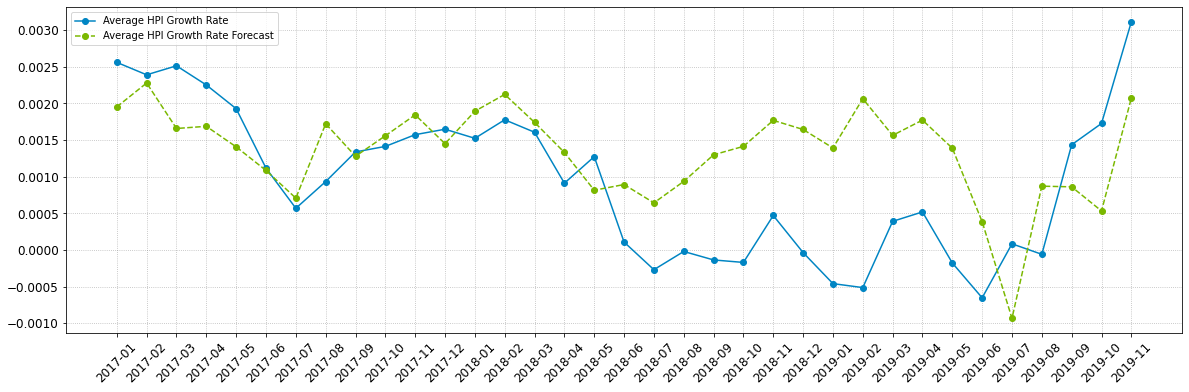

In [213]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from scipy.signal import savgol_filter

color1 = '#0085c3'
color2 = '#7ab800'
color3 = '#dc5034'
x = date_frame[-35:]['Description']
y = inv_yhat
y2 = inv_y
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111)
ax.plot( x,y2, marker='o', color=color1, label= 'Average HPI Growth Rate')
ax.plot(x, y, marker='o',ls='--', color=color2, label='Average HPI Growth Rate Forecast')
ax.grid(ls=':', color='gray', alpha=0.6)

ax.legend(loc='upper left', fontsize=10)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

